# **CHAPTER_9**

## **9.1 matplotlib API 간략하게 살펴보기**

In [ ]:
%matplotlib notebook

### **9.1.1 figure와 서브플롯**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

matplotlib에서 그래프는 Figure 객체 내에 존재한다. 빈 figure만으로는 그래프를 그릴 수 없으며 add_subplot을 사용해서 최소 하나 이상의 subplots을 생성해야한다. 

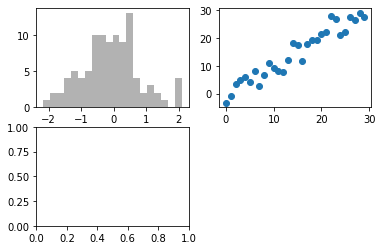

In [ ]:
# 추가적인 그래프를 그릴 경우 동일한 셀에서 실행해야한다. 
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

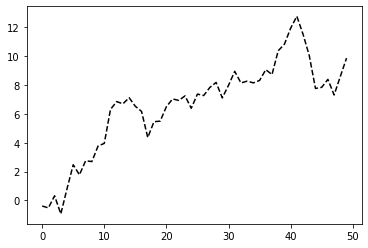

In [ ]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

**서브플롯 간의 간격 조절하기**

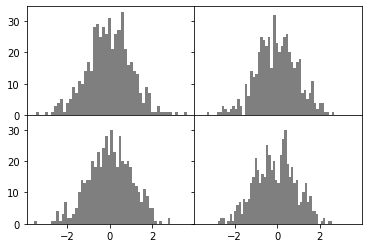

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### **9.1.2 색상, 마커, 선 스타일**

그래프를 더욱 깔끔하게 보이게 하기 위해 마커를 추가하기도 하고 plot의 색, 점선 옵션을 추가하기도 한다. 색상은 RGB 값을 직접 지정하여 색상표에 있는 색을 지정할 수 있으며 drawstyle 값을 조정해 일정 간격에 따라 그래프를 연결할 수도 있다. 

drawstyle 옵션: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}



> (참고) https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html



In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

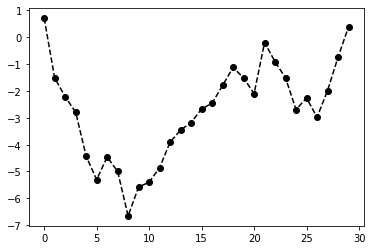

In [ ]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

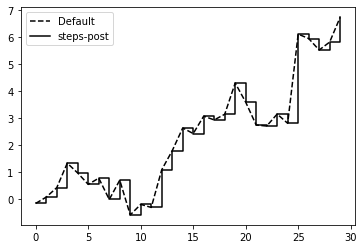

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### **9.1.3 눈금, 라벨, 범례**

pyplot 인터페이스를 이용해 객체 지향적인 방법으로 시각화할 수 있다. 메서드로 표의 범위나 눈금 위치, 이름 등을 조정할 수 있다. 이렇게 생성한 것들은 AxesSubplot 객체에 대해 동작한다. set_xticks, set_xticklabels 메서드를 사용하여 눈금 배치를 할 수 있으며 다른 눈금으로 지정하고 싶은 경우에는 후자의 방법을 사용하면 된다. 

Text(0.5, 0, 'Stages')

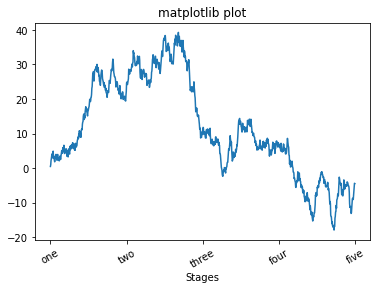

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one','two', 'three', 'four', 'five'], rotation = 30)
ax.set_title('matplotlib plot')
ax.set_xlabel('Stages')

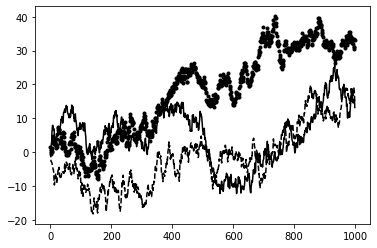

In [ ]:
# label 옵션을 사용하여 그래프에 인자를 넘기고 범례를 추가할 수 있다. 

from numpy.random import randn

fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

### **9.1.4 주석과 그림 추가하기**

주석과 글자는 text, arrow, annotate 함수를 이용해서 추가할 수 있고 일반적인 도형을 표현하기 위해서는 patches라는 객체를 통해 그래프를 그릴 수 있다. ax.annotate 메서드를 이용해서 지정한 위치에 라벨을 추가할 수 있으며 arrowprops 옵션은 화살표를 통해 그래프의 위치를 지정할 수 있다. 도형을 추가하기 위해서는 patches 객체인 shp를 형성하여 add_patch를 호출할 수 있다. 

In [ ]:
from datetime import datetime
import pandas as pd

ax = fig.add_subplot(1,1,1)

data = pd.read_csv('/content/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

spx.plot(ax = ax, style = "k-")

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
  ax.annotate(label, xy = (date, spx.asof(date)+75),
              xytext = (date, spx.asof(date) + 225),
              arrowprops = dict(facecolor = 'black', headwidth = 4, width = 2, headlength = 5),
              horizontalalignment = 'left', verticalalignment = 'top')
  

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

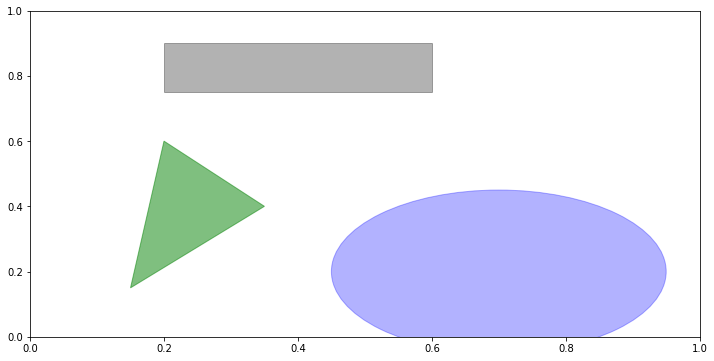

In [ ]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.25, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### **9.1.5 그래프를 파일로 저장하기**





활성화된 figure는 plt.savefig 메서드를 이용해서 파일로 저장할 수 있다. 파일의 종류는 plt 메소드가 아닌 지정한 확장자를 기준으로 결정되며 .pdf를 통해 pdf파일을 얻을 수도 있다. dpi를 통해 해상도를 조절할 수 있으며 bbox_inches를 통해 실제 figure 둘레의 공백을 잘라낼 수 있다. 또한 유사한 객체에 저장하는 것 또한 가능하다. 

(예시) plt.savefig('seminar.png')

## **9.2 pandas에서 seaborn으로 그래프 그리기** 

### **9.2.1 선그래프**

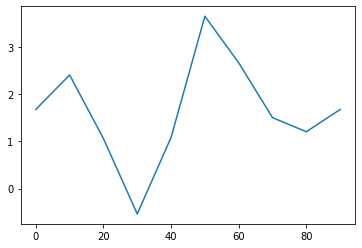

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))

s.plot()

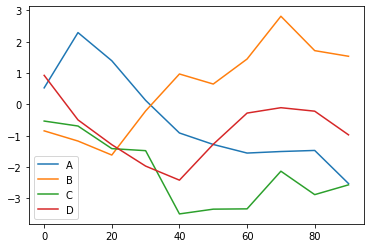

In [ ]:
# column 별로 구분하여 한 그래프에 표현할 수 있다. 또한 Series 메서드 인자에서 로그 스케일링을 통한 출력 결과를 얻을 수 있다. 

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### **9.2.2 막대그래프**


plot.bar(), plot.barh()는 수직, 수평 막대그래프를 그린다. 이때 Series의 value_counts 메서드를 이용해서 값의 빈도를 그릴 수 있다. 

(ex) s.value_counts().plot.bar())

seaborn의 경우 set 메서드를 이용해서 꾸밈새를 변경할 수도 있다. 

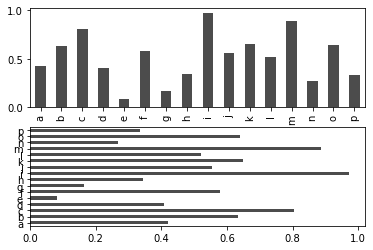

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
np.random.seed(123)

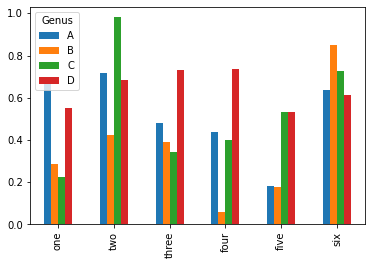

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

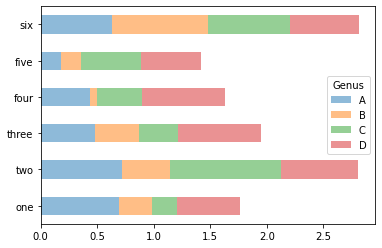

In [ ]:
# 누적값 또한 출력할 수 있다. 

df.plot.barh(stacked = True, alpha = 0.5)

In [ ]:
tips = pd.read_csv('/content/tips.csv')

# 교차 테이블 생성(요일, 파티 숫자에 따라)
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


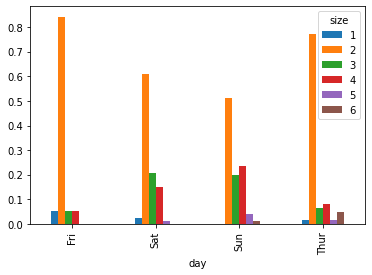

In [ ]:
#  각 로우의 합이 1이 되도록 정규화한 후 그래프를 그릴 수 있다. 여기서 party_count.div(s) = party_count / s를 의미한다. 
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts.plot.bar()

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


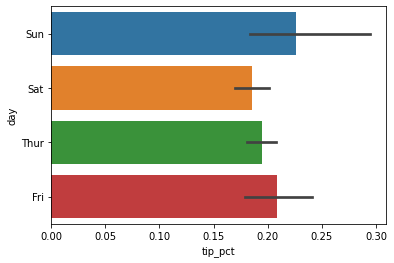

In [ ]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

### **9.2.3 히스토그램과 밀도 그래프**

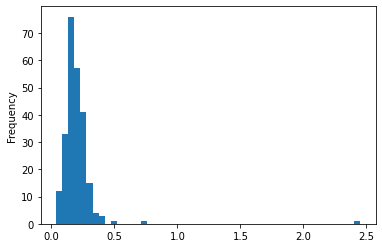

In [ ]:
tips['tip_pct'].plot.hist(bins = 50)

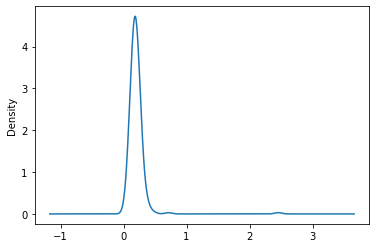

In [ ]:
tips['tip_pct'].plot.density()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


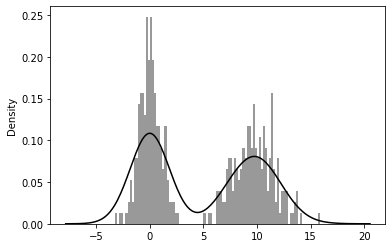

In [ ]:
# 두 개의 다른 표준정규분포로 이루어진 양봉 분포에 대한 시각화이다. 

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### **9.2.4 산포도**

In [ ]:
macro = pd.read_csv('/content/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

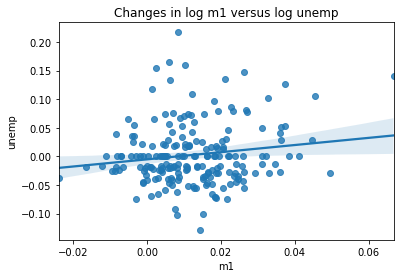

In [ ]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

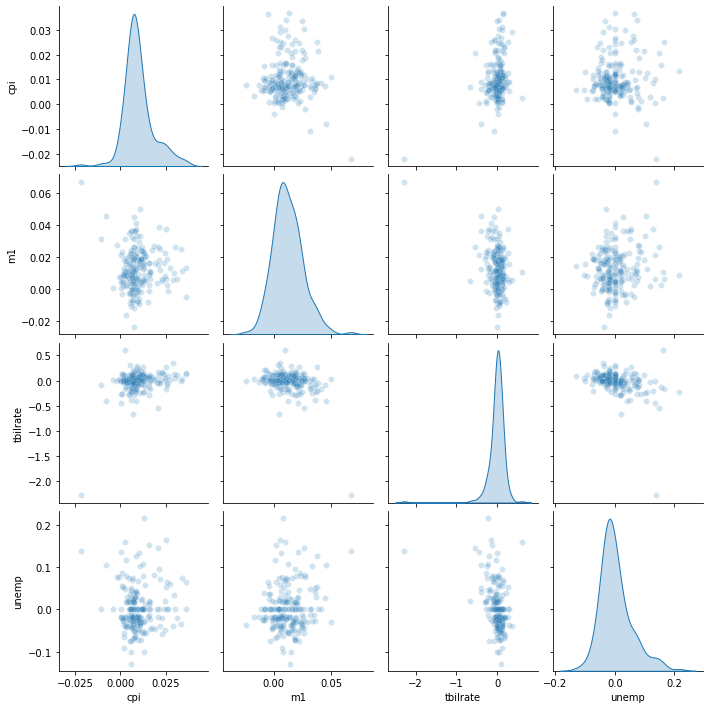

In [ ]:
# eda 과정에서 변수 그룹 간의 모든 산포도를 살펴보는 것은 매우 유용하며, 이를 짝지은 그래프 혹은 산포도 행렬이라고 한다. 이는 seaborn의 pairplot 함수를 이용하여 히스토그램이나 밀도 그래프를 생성할 수 있다. 

sns.pairplot(trans_data, diag_kind='kde', plot_kws = {'alpha': 0.2})

### **9.2.5 패싯 그리드와 범주형 데이터**

factor plot은 seaborn에서 여러 타입의 그래프를 그릴 수 있게 하며 특히 hue 인자에 특정 변수를 지정하여 범례를 지정할 수 있다. factor plot은 FacetGrid의 categorical plot을 위한 함수이며 kind 파라미터로 box plot, violin, bar, strip plots 옵션을 지정하여 여러 형태의 그래프를 그릴 수 있다. 



> (참고) https://www.kite.com/python/docs/seaborn.factorplot



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


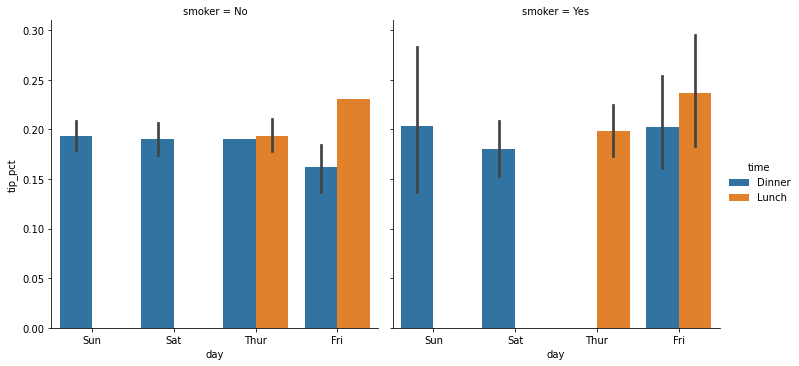

In [ ]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


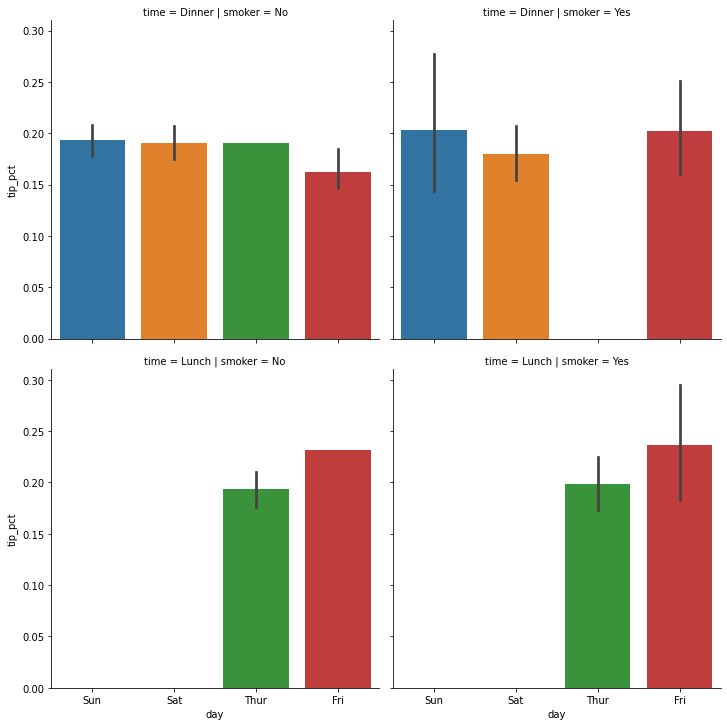

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


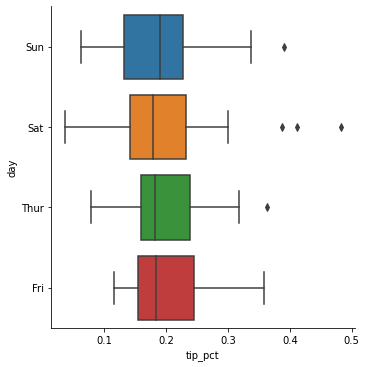

In [ ]:
# seaborn을 이용해 중간값, 사분위, 특잇값을 보여주는 상자그림으로 시각화할 수 있다. factorplot의 경우 보여주고자하는 목적에 어울리는 다양한 종류의 그래프를 지원한다.  
sns.factorplot(x='tip_pct', y='day', kind='box',data=tips[tips.tip_pct < 0.5])